# Lab Assignment - 5

Train the following Convolutional Neural Networks for the MNIST dataset (digits 0–9) using TensorFlow-Keras and PyTorch.
 Train the CNN model with one convolutional layer, one pooling layer, and a dense softmax output layer using mini-batch gradient descent.
Train the LeNet model using mini-batch gradient descent.
For each method and framework, plot loss and accuracy at the end. Train for a varying number of epochs.

## Tensorflow - Keras Implementation

In [2]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 122.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 127.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.6 MB/s eta 0:00:00


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8661 - loss: 0.4931 - val_accuracy: 0.9664 - val_loss: 0.1167
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9686 - loss: 0.1098 - val_accuracy: 0.9734 - val_loss: 0.0894
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9779 - loss: 0.0760 - val_accuracy: 0.9781 - val_loss: 0.0701
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9815 - loss: 0.0644 - val_accuracy: 0.9813 - val_loss: 0.0572
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9846 - loss: 0.0508 - val_accuracy: 0.9815 - val_loss: 0.0587
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9881 - loss: 0.0425 - val_accuracy: 0.9805 - val_loss: 0.0593
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9881 - loss: 0.0402 - val_accuracy: 0.9830 - val_loss: 0.0547
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9892 - loss: 0.0366 - 

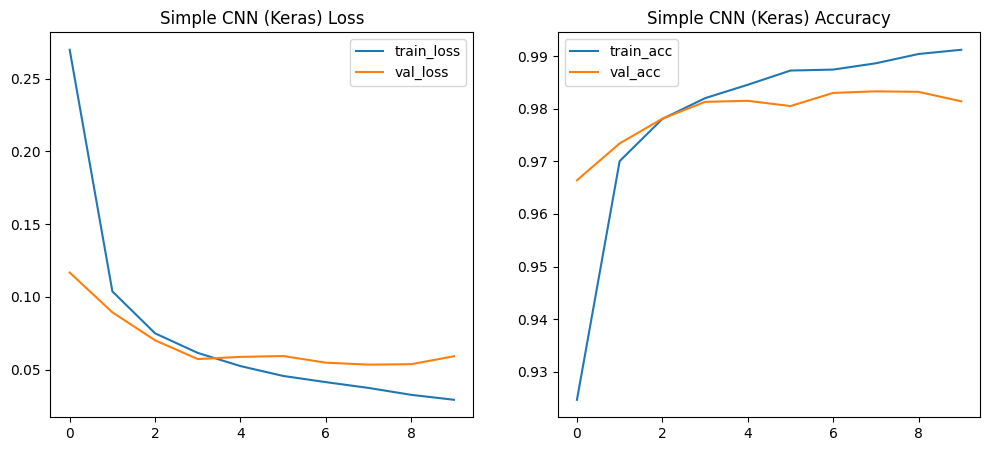

TypeError: AveragePooling2D.__init__() missing 1 required positional argument: 'pool_size'

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # normalize
x_train = x_train[..., tf.newaxis]  # (60000, 28, 28, 1)
x_test = x_test[..., tf.newaxis]

# =====================
#  Model 1: Simple CNN
# =====================
def simple_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
    return model

# =====================
#  Model 2: LeNet
# =====================
def lenet():
    model = models.Sequential([
        layers.Conv2D(6, (5,5), activation='relu', input_shape=(28,28,1), padding='same'),
        layers.AveragePooling2D(),
        layers.Conv2D(16, (5,5), activation='relu'),
        layers.AveragePooling2D(),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Training function
def train_and_plot(model, name, epochs=5, batch_size=64):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_test, y_test))

    # Plot Loss and Accuracy
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f"{name} Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title(f"{name} Accuracy")
    plt.legend()

    plt.show()

# Run training
train_and_plot(simple_cnn(), "Simple CNN (Keras)", epochs=10)
train_and_plot(lenet(), "LeNet (Keras)", epochs=10)


## PyTorch Implementation

100%|██████████| 9.91M/9.91M [00:00<00:00, 37.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.12MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.5MB/s]


Epoch 1/10 | Train Acc: 92.45% | Test Acc: 97.05%
Epoch 2/10 | Train Acc: 97.38% | Test Acc: 97.86%
Epoch 3/10 | Train Acc: 97.99% | Test Acc: 97.98%
Epoch 4/10 | Train Acc: 98.30% | Test Acc: 98.15%
Epoch 5/10 | Train Acc: 98.51% | Test Acc: 97.98%
Epoch 6/10 | Train Acc: 98.75% | Test Acc: 98.18%
Epoch 7/10 | Train Acc: 98.90% | Test Acc: 98.29%
Epoch 8/10 | Train Acc: 99.00% | Test Acc: 98.22%
Epoch 9/10 | Train Acc: 99.11% | Test Acc: 98.21%
Epoch 10/10 | Train Acc: 99.22% | Test Acc: 98.25%


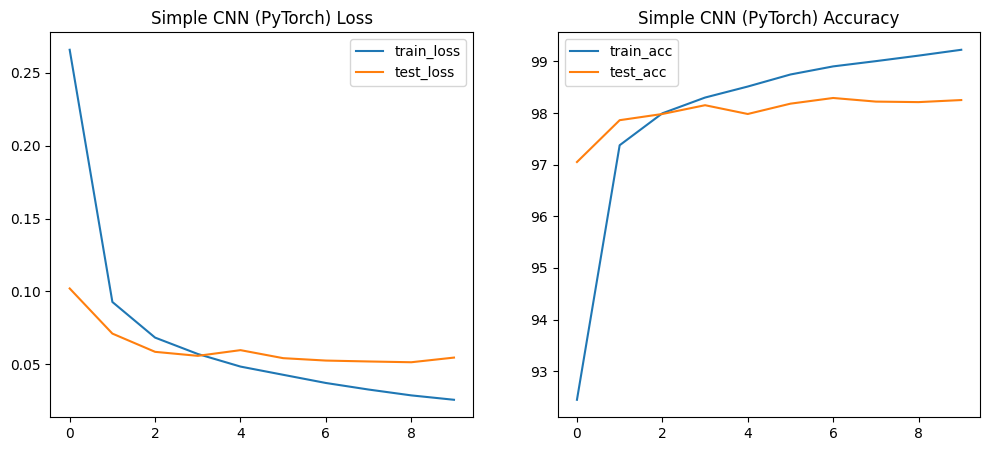

Epoch 1/10 | Train Acc: 88.11% | Test Acc: 96.74%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Data loading & preprocessing
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =====================
#  Model 1: Simple CNN
# =====================
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv = nn.Conv2d(1, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(32*13*13, 10)

    def forward(self, x):
        x = torch.relu(self.conv(x))
        x = self.pool(x)
        x = x.view(-1, 32*13*13)
        x = self.fc(x)
        return x

# =====================
#  Model 2: LeNet
# =====================
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        self.pool = nn.AvgPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 16*5*5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# =====================
#  Training Loop
# =====================
def train_model(model, name, epochs=5):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses, test_losses, train_acc, test_acc = [], [], [], []

    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(trainloader))
        train_acc.append(100 * correct / total)

        # Test phase
        model.eval()
        test_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_losses.append(test_loss / len(testloader))
        test_acc.append(100 * correct / total)

        print(f"Epoch {epoch+1}/{epochs} | Train Acc: {train_acc[-1]:.2f}% | Test Acc: {test_acc[-1]:.2f}%")

    # Plot Loss and Accuracy
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(train_losses, label='train_loss')
    plt.plot(test_losses, label='test_loss')
    plt.title(f"{name} Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(train_acc, label='train_acc')
    plt.plot(test_acc, label='test_acc')
    plt.title(f"{name} Accuracy")
    plt.legend()
    plt.show()

# Run training
train_model(SimpleCNN(), "Simple CNN (PyTorch)", epochs=10)
train_model(LeNet(), "LeNet (PyTorch)", epochs=10)